In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.modeling import models, fitting
import numpy as np
import rafias_lib as rl
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Test 1 (the 320 x 320 set)
##### 2016-01-12(T20h57m57 + T20h58m27)

##### Importing files

In [2]:
#Importing a1 files
hdu_filenames_a11 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/\
NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a11)

60

In [3]:
#Importing b4 files
hdu_filenames_b41 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/\
NRCN821WLP8SUB640-6012200140_1_489_SE_2016-01-12T20h58m27/*.slp.fits')
len(hdu_filenames_b41)

60

##### Gaussian fitting step

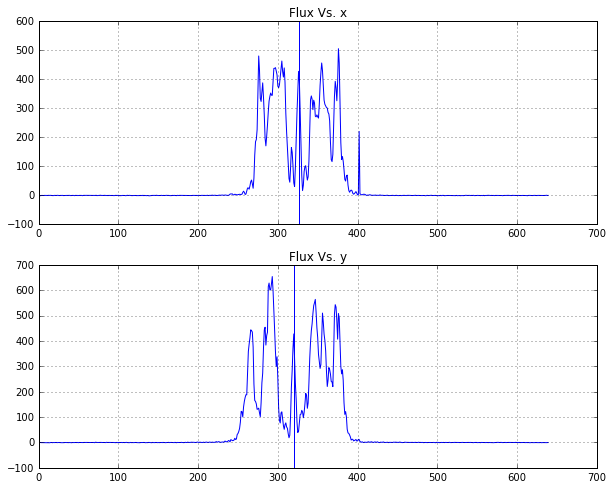

In [4]:
# Analyzing data to guess parameters (a1)
hdu_a11 = fits.open(hdu_filenames_a11[10])
image_a11 = hdu_a11[0].data
image2d_a11 = image_a11[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_a11[320,:])
plt.axvline(326)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_a11[:,326])
plt.axvline(320)
plt.grid(True)

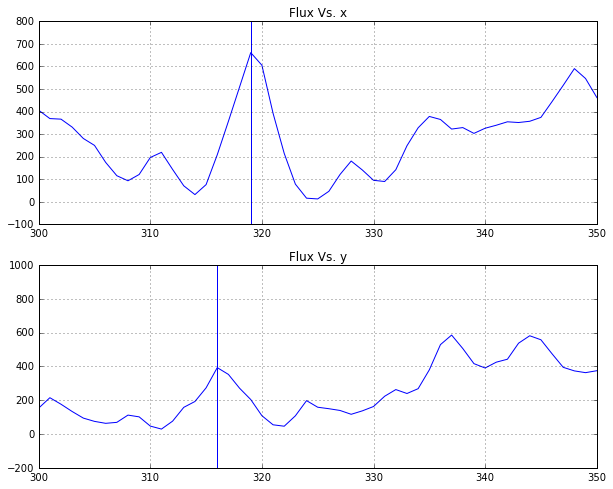

In [5]:
# Analyzing data to guess parameters (b4)
hdu_b41 = fits.open(hdu_filenames_b41[10])
image_b41 = hdu_b41[0].data
image2d_b41 = image_b41[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_b41[316,:])
plt.axvline(319)
plt.xlim(300,350)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_b41[:,321])
plt.axvline(316)
plt.xlim(300,350)
plt.grid(True)

In [6]:
# Guessing parameters(a1)
guess_centerX_a11 = 326
guess_centerY_a11 = 320
amp_a11 = 450
# Guessing parameters(b4)
guess_centerX_b41 = 319
guess_centerY_b41 = 316
amp_b41 = 500

In [7]:
centers_a11 = rl.gen_center_g2d(guess_centerX_a11, guess_centerY_a11, 5, amp_a11, 2, 2, 0, hdu_filenames_a11)
centers_b41 = rl.gen_center_g2d(guess_centerX_b41, guess_centerY_b41, 5, amp_b41, 2, 2, 0, hdu_filenames_b41)

######  **Radius Testing was done in a seperate notebook**
#### Obtaining Average Residual Flux

In [9]:
data = rl.average_residual_flux(centers_a11[0], centers_b41[0],90,100,110, hdu_filenames_a11, hdu_filenames_b41)

In [14]:
errors_a1 = rl.norm_flux_error(data['a1_res_flux'], 2.2, hdu_filenames_a11)
errors_b4 = rl.norm_flux_error(data['b4_res_flux'], 2.5, hdu_filenames_b41)
errors = (np.sqrt(np.square(errors_a1)+np.square(errors_b4)))*0.5
len(errors)

60

#### Getting detrended time series and obtaining standard deviation

ValueError: yerr must be a scalar, the same dimensions as y, or 2xN.

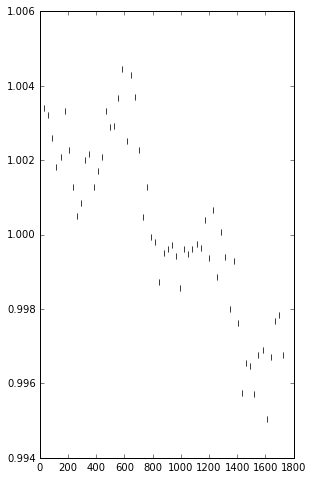

In [16]:
detrended_ts = rl.linear_bestfit(data['Time'], data['a1_b4_res_flux'], 0, errors, 0.00002, 0.99, 'g.')
np.std(detrended_ts)

## Creating a generalized function to analyze different tests

In [12]:
def get_stdev(guess_centerX_a1,guess_centerY_a1,guess_centerX_b4,guess_centerY_b4,amp_a1,amp_b4,hdu_filenames_a1,hdu_filenames_b4):
    centers_a1 = rl.gen_center_g2d(guess_centerX_a1, guess_centerY_a1, 5, amp_a1, 2, 2, 0, hdu_filenames_a1)
    centers_b4 = rl.gen_center_g2d(guess_centerX_b4, guess_centerY_b4, 5, amp_b4, 2, 2, 0, hdu_filenames_b4)
    data = rl.average_residual_flux(centers_a1,centers_b4,90,100,110, hdu_filenames_a1, hdu_filenames_b4)
    detrended_ts = rl.linear_bestfit(data['Time'], data['a1_b4_res_flux'], 0, 0, 0.00002, 0.99, '.')
    return np.std(detrended_ts)

## Test 2 (the old set)
##### 2016-01-12(T16h42m53 + T16h43m29)

In [13]:
#Importing a1 files
hdu_filenames_a12 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')
len(hdu_filenames_a12)

306

In [14]:
#Importing b4 files
hdu_filenames_b42 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/'+
                              'NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/*.slp.fits')
len(hdu_filenames_b42)

307

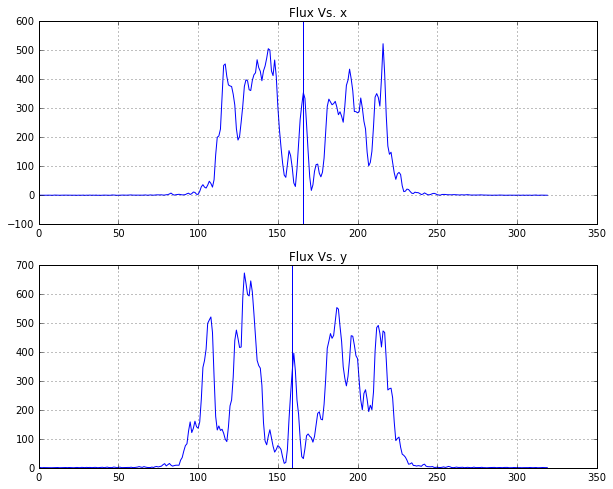

In [15]:
# Analyzing data to guess parameters (a1)
hdu_a12 = fits.open(hdu_filenames_a12[10])
image_a12 = hdu_a12[0].data
image2d_a12 = image_a12[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_a12[161,:])
plt.axvline(166)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_a12[:,167])
plt.axvline(159)
plt.grid(True)

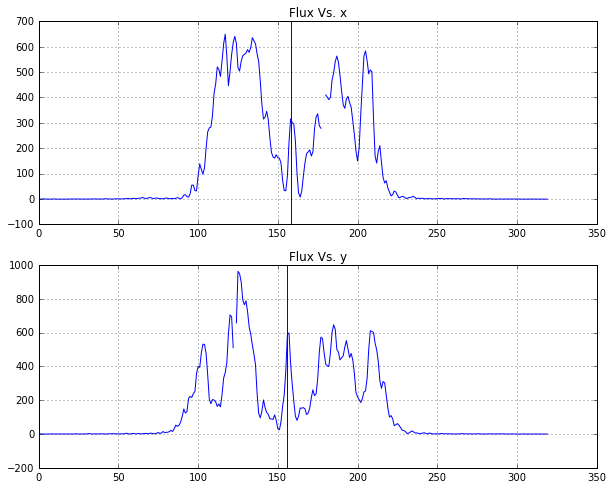

In [16]:
# Analyzing data to guess parameters (b4)
hdu_b42 = fits.open(hdu_filenames_b42[10])
image_b42 = hdu_b42[0].data
image2d_b42 = image_b42[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_b42[159,:])
plt.axvline(158)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_b42[:,160])
plt.axvline(156)
plt.grid(True)

In [ ]:
# Guessing parameters(a1)
guess_centerX_a12 = 166
guess_centerY_a12 = 160
amp_a12 = 350
# Guessing parameters(b4)
guess_centerX_b42 = 158
guess_centerY_b42 = 156
amp_b42 = 350

In [ ]:
get_stdev(guess_centerX_a12,guess_centerY_a12,guess_centerX_b42,guess_centerY_b42,amp_a12,amp_b42,hdu_filenames_a12,hdu_filenames_b42)

## Test 3 (the latest version)
##### 2016-01-12(T16h42m53 + T16h43m29)

In [ ]:
#Importing a1 files
hdu_filenames_a13 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')
len(hdu_filenames_a13)

In [ ]:
#Importing b4 files
hdu_filenames_b43 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/*.slp.fits')
len(hdu_filenames_b43)

In [ ]:
# Analyzing data to guess parameters (a1)
hdu_a13 = fits.open(hdu_filenames_a13[10])
image_a13 = hdu_a13[0].data
image2d_a13 = image_a13[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_a13[161,:])
plt.axvline(166)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_a13[:,167])
plt.axvline(159)
plt.grid(True)

In [ ]:
# Analyzing data to guess parameters (b4)
hdu_b43 = fits.open(hdu_filenames_b43[10])
image_b43 = hdu_b43[0].data
image2d_b43 = image_b43[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_b43[159,:])
plt.axvline(158)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_b43[:,160])
plt.axvline(156)
plt.grid(True)

In [ ]:
# Guessing parameters(a1)
guess_centerX_a13 = 166
guess_centerY_a13 = 159
amp_a13 = 350
# Guessing parameters(b4)
guess_centerX_b43 = 158
guess_centerY_b43 = 156
amp_b43 = 350

In [ ]:
get_stdev(guess_centerX_a13,guess_centerY_a13,guess_centerX_b43,guess_centerY_b43,amp_a13,amp_b43,hdu_filenames_a13,hdu_filenames_b43)

## Test 4 (the .red.fits data)
##### 2016-01-13(T01h03m43 + T01h03m23)

In [ ]:
#Importing a1 files
hdu_filenames_a14 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/reduced_separated_MMM/'+
                              'NRCN821WLP8FULLQ-6013001651_1_481_SE_2016-01-13T01h03m43/*.red.fits')
len(hdu_filenames_a14)

In [ ]:
#Importing b4 files
hdu_filenames_b44 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/reduced_separated_MMM/'+
                              'NRCN821WLP8FULLQ-6013002009_1_489_SE_2016-01-13T01h03m23/*.red.fits')
len(hdu_filenames_b44)

In [ ]:
# Creating imafe 2d (a1)
image2d_a14 = []
for hdus_a14 in hdu_filenames_a14:
        hdu_a14 = fits.open(hdus_a14)
        image_a14 = hdu_a14[0].data
        header_a14 = hdu_a14[0].header
        slp_image_a1 = (image_a14[1] - image_a14[0])/header_a14['TGROUP']
        image2d_a14.append(slp_image_a1)
len(image2d_a14)

In [ ]:
# Creating imafe 2d (a1)
image2d_b44 = []
for hdus_b44 in hdu_filenames_b44:
        hdu_b44 = fits.open(hdus_b44)
        image_b44 = hdu_b44[0].data
        header_b44 = hdu_b44[0].header
        slp_image_b4 = (image_b44[1] - image_b44[0])/header_b44['TGROUP']
        image2d_b44.append(slp_image_b4)
len(image2d_b44)

In [ ]:
# Analyzing data to guess parameters (a1)

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(slp_image_a1[1036,:])
plt.xlim(1350,1450)
plt.axvline(1405)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(slp_image[:,1405])
plt.xlim(1000,1100)
plt.axvline(1036)
plt.grid(True)

In [ ]:
# Analyzing data to guess parameters (b4)

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(slp_image_b4[819,:])
plt.xlim(800,900)
plt.axvline(828)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(slp_image_b4[:,828])
plt.xlim(800,900)
plt.axvline(819)
plt.grid(True)

In [ ]:
centers_a1 = rl.gen_center_g2d(1405, 1036, 5, 400, 4, 4, 0, hdu_filenames_a14, red_files = True)
centers_a1

In [ ]:
centers_b4 = rl.gen_center_g2d(828, 821, 5, 600, 4, 4, 0, hdu_filenames_b44, red_files = True)
centers_b4

In [ ]:
reload(rl)
data4 = rl.average_residual_flux(centers_a1, centers_b4, 60, 80, 90, hdu_filenames_a14, hdu_filenames_b44,
                                red_files = True)
data4

In [ ]:
np.std(data4['a1_b4_res_flux']/np.median(data4['a1_b4_res_flux']))

In [ ]:
reload(rl)
x4 = data4['Time']
y41 = data4['a1_res_flux']
y42 = data4['b4_res_flux']
y43 = data4['a1_b4_res_flux']
rl.light_curve(x4, y41, 0, 0, 'g.-', 'a1 time series')
rl.light_curve(x4, y42, 0, 0, 'r.-', 'b4 time series')
rl.light_curve(x4, y43, 0, 0, '.-', 'averaged time series')
plt.legend(loc='upper left')

## Test 5 (640 x 640, old set)
##### 2016-01-12(T20h57m57 + T20h58m27)

In [ ]:
#Importing a1 files
hdu_filenames_a15 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/'+
                              'NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a15)

In [ ]:
#Importing b4 files
hdu_filenames_b45 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/'+
                              'NRCN821WLP8SUB640-6012200140_1_489_SE_2016-01-12T20h58m27/*.slp.fits')
len(hdu_filenames_b45)

In [ ]:
# Analyzing data to guess parameters (a1)
hdu_a15 = fits.open(hdu_filenames_a15[10])
image_a15 = hdu_a15[0].data
image2d_a15 = image_a15[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_a15[320,:])
plt.axvline(326)
plt.xlim(300, 400)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_a15[:,326])
plt.axvline(320)
plt.xlim(300, 400)
plt.grid(True)

In [ ]:
# Analyzing data to guess parameters (b4)
hdu_b45 = fits.open(hdu_filenames_b45[10])
image_b45 = hdu_b45[0].data
image2d_b45 = image_b45[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_b45[316,:])
plt.axvline(319)
plt.xlim(300,350)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_b45[:,321])
plt.axvline(316)
plt.xlim(300,350)
plt.grid(True)

In [ ]:
# Guessing parameters(a1)
guess_centerX_a15 = 326
guess_centerY_a15 = 320
amp_a15 = 450
# Guessing parameters(b4)
guess_centerX_b45 = 319
guess_centerY_b45 = 316
amp_b45 = 500

In [ ]:
get_stdev(guess_centerX_a15,guess_centerY_a15,guess_centerX_b45,guess_centerY_b45,amp_a15,amp_b45,hdu_filenames_a15,hdu_filenames_b45)

## Test 6 (640 x 640, latest version)
##### 2016-01-12(T20h57m57 + T20h58m27)

In [ ]:
#Importing a1 files
hdu_filenames_a16 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              +'NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a16)

In [ ]:
#Importing a1 files
hdu_filenames_b46 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8SUB640-6012200140_1_489_SE_2016-01-12T20h58m27/*.slp.fits')
len(hdu_filenames_b46)

In [ ]:
# Analyzing data to guess parameters (a1)
hdu_a16 = fits.open(hdu_filenames_a16[10])
image_a16 = hdu_a16[0].data
image2d_a16 = image_a16[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_a16[320,:])
plt.axvline(326)
plt.xlim(300, 400)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_a16[:,326])
plt.axvline(320)
plt.xlim(300, 400)
plt.grid(True)

In [ ]:
# Analyzing data to guess parameters (b4)
hdu_b46 = fits.open(hdu_filenames_b46[10])
image_b46 = hdu_b46[0].data
image2d_b46 = image_b46[0]

plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_b46[316,:])
plt.axvline(319)
plt.xlim(300,350)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_b46[:,321])
plt.axvline(316)
plt.xlim(300,350)
plt.grid(True)

In [ ]:
# Guessing parameters(a1)
guess_centerX_a16 = 326
guess_centerY_a16 = 320
amp_a16 = 450
# Guessing parameters(b4)
guess_centerX_b46 = 319
guess_centerY_b46 = 316
amp_b46 = 500

In [ ]:
get_stdev(guess_centerX_a16,guess_centerY_a16,guess_centerX_b46,guess_centerY_b46,amp_a16,amp_b46,hdu_filenames_a16,hdu_filenames_b46)